# 02 - Test GAM Model with Test Set

In notebook 01, I found the set of features and lambda coefficients that yield the best age predictions, and got age predictions for birds in the validation set using bird-fold cross validation. Now I'm going to see how that model performs on a test dataset, which wasn't used for hyperparameter tuning. This will test the model's generalization. 

## Imports

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pygam import LinearGAM, s, f
from sklearn.model_selection import LeaveOneGroupOut

## Prepare Dataset

In [3]:
path_to_feats = 'C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\'

### Load Duke Data

In [4]:
all_feats = pd.read_csv(path_to_feats + "Duke_all_features_morning.csv").drop(columns= 'Unnamed: 0')

### Load UTSW Data

In [5]:
all_feats_utsw = pd.read_csv( path_to_feats + "utsw_all_features_morning.csv").drop(columns= 'Unnamed: 0')

### Load Extra UTSW Birds

In [6]:
acoustics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\FP1_normal_morning_only\\morning_Juvenile_acoustic_features.csv').drop(columns = 'Unnamed: 0')
syntax = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\FP1_normal_morning_only\\morning_syntax_features_whisper_UMAP.csv").drop(columns = 'Unnamed: 0')
rhythm_spectrum_feats = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\FP1_normal_morning_only\\morning_rhythm_spectrum_features.csv").drop(columns = 'Unnamed: 0')
timing_seg_feats = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\FP1_normal_morning_only\\morning_syllable_and_gap_duration_entropies.csv").drop(columns = 'Unnamed: 0')



In [7]:
all_feats_new = pd.merge(acoustics, syntax, on =["Bird_ID", 'age'])
all_feats_new = pd.merge(all_feats_new, rhythm_spectrum_feats, on = ["Bird_ID", 'age'])
all_feats_new = pd.merge(all_feats_new, timing_seg_feats, on = ["Bird_ID", 'age'])
all_feats_new['colony'] = 'fp1'

In [8]:
all_feats = pd.concat([all_feats, all_feats_utsw, all_feats_new])

In [9]:
all_feats = all_feats[~all_feats.Bird_ID.isin(['S833', 'Y856', 'O833', 'notag833'])]

### Load Test set group 1

In [10]:
acoustics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_test_set_moring\\morning_Juvenile_acoustic_features.csv').drop(columns = 'Unnamed: 0')
syntax = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_test_set_moring\\morning_syntax_features_whisper_UMAP.csv").drop(columns = 'Unnamed: 0')
rhythm_spectrum_feats = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_test_set_moring\\morning_rhythm_spectrum_features.csv").drop(columns = 'Unnamed: 0')
timing_seg_feats = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_test_set_moring\\morning_syllable_and_gap_duration_entropies.csv").drop(columns = 'Unnamed: 0')


In [11]:
all_feats_new = pd.merge(acoustics, syntax, on =["Bird_ID", 'age'])
all_feats_new = pd.merge(all_feats_new, rhythm_spectrum_feats, on = ["Bird_ID", 'age'])
all_feats_new = pd.merge(all_feats_new, timing_seg_feats, on = ["Bird_ID", 'age'])
all_feats_new['colony'] = 'test'

In [12]:
all_feats_new.shape

(44, 60)

In [13]:
all_feats = pd.concat([all_feats, all_feats_new])

### Load Test set group 2

In [14]:
acoustics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_birds_features\\morning_only\\test_morning_Juvenile_acoustic_features.csv').drop(columns = 'Unnamed: 0')
syntax = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_birds_features\\morning_only\\test_morning_syntax_features_whisper_UMAP.csv").drop(columns = 'Unnamed: 0')
rhythm_spectrum_feats = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_birds_features\\morning_only\\test_morning_rhythm_spectrum_features.csv").drop(columns = 'Unnamed: 0')
timing_seg_feats = pd.read_csv("C:\\Grad_School\\Code_and_software\\Py_code\\All_features_2023\\All_features_2023\\Juvenile_bird_analysis\\utsw_birds_features\\morning_only\\test_morning_syllable_and_gap_duration_entropies.csv").drop(columns = 'Unnamed: 0')



In [15]:
all_feats_new = pd.merge(acoustics, syntax, on =["Bird_ID", 'age'])
all_feats_new = pd.merge(all_feats_new, rhythm_spectrum_feats, on = ["Bird_ID", 'age'])
all_feats_new = pd.merge(all_feats_new, timing_seg_feats, on = ["Bird_ID", 'age'])
all_feats_new['colony'] = 'test'

In [16]:
all_feats_new.shape

(16, 60)

In [17]:
all_feats = pd.concat([all_feats, all_feats_new])

In [18]:
all_feats.shape

(103, 60)

### Drop Amplitude Features

In [19]:
amplitude_features = all_feats.columns[['Amplitude' in x for x in all_feats.columns.tolist()]]

all_feats = all_feats.drop(columns= amplitude_features)

### Normalize Feature Set

In [20]:
full_feats_only = np.array(all_feats.drop(columns = ['Bird_ID', 'age', 'entropy_rate', 'colony', 'num_syllables']))

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
full_feats_only_norm = scaler.fit_transform(full_feats_only)
y = all_feats.age


In [22]:
y = np.array(y).flatten()

## Bird-Fold Cross Validation

In [23]:
groups = all_feats.Bird_ID
groups = groups.reset_index().drop(columns = 'index')
groups.values.flatten()

array(['grn394', 'grn394', 'grn394', 'grn395', 'grn395', 'grn395',
       'grn475', 'grn475', 'grn397', 'grn397', 'sil469', 'sil469',
       'grn394', 'grn395', 'grn397', 'grn475', 'sil469', 'grn394',
       'grn475', 'grn397', 'sil469', 'grn395', 'S855', 'S855', 'S855',
       'S855', 'S855', 'Y855', 'Y855', 'Y855', 'Y855', 'Y855', 'Y855',
       'S856', 'S856', 'S856', 'S856', 'S856', 'S856', 'O434', 'O440',
       'R425', 'R469', 'G266', 'G266', 'G266', 'G266', 'G266', 'G266',
       'G266', 'G266', 'G266', 'G266', 'G266', 'G266', 'G266', 'G266',
       'G266', 'G266', 'G266', 'G266', 'G266', 'G266', 'G266', 'G266',
       'G266', 'R262', 'R262', 'R262', 'R262', 'R262', 'R262', 'R262',
       'R262', 'R262', 'R262', 'R262', 'R262', 'R262', 'R262', 'R262',
       'R262', 'R262', 'R262', 'R262', 'R262', 'S264', 'O883', 'O883',
       'O883', 'O883', 'O883', 'O883', 'R883', 'R883', 'R883', 'R883',
       'O472', 'O472', 'O472', 'O472', 'Y472', 'Y472'], dtype=object)

In [24]:
feature_list = all_feats.drop(columns = ['Bird_ID', 'age', 'entropy_rate', 'colony', 'num_syllables']).columns.to_list()

In [25]:
#this is taken from notebook 1 where we did forward feature selection
selected_feature_indices = [41, 36, 19, 33, 16, 24, 34]

In [26]:
[feature_list[x] for x in selected_feature_indices]

['syllable_duration_entropy',
 'entropy_rate_norm',
 'Goodness_CV_min',
 'duration_CV_median',
 'duration_mean_min',
 'Entropy_CV_median',
 'duration_CV_min']

In [27]:

#set terms of the model based on selected features
terms = s(selected_feature_indices[0], lam = 0.1) + s(selected_feature_indices[1], lam = 1.0) + \
        s(selected_feature_indices[2], lam = 0.1) + s(selected_feature_indices[3], lam = 10) + \
        s(selected_feature_indices[4], lam = 0.1) + s(selected_feature_indices[5], lam = 0.1) + \
        s(selected_feature_indices[6], lam = 1.0) 

#create bird-fold cross validation object
logo = LeaveOneGroupOut()
splits = logo.split(full_feats_only_norm, groups = all_feats.Bird_ID)

#initialize empty arrays to store predictions
y_preds = np.array([])
y_tests = np.array([])
Bird_IDs = np.array([])
#train and predict for each split in cross validation object
for train_index, test_index in splits:
    #print(groups.iloc[test_index].values[0])

    X_train, X_test = full_feats_only_norm[(train_index)], full_feats_only_norm[(test_index)]
    y_train, y_test = y[(train_index)], y[(test_index)]

    gam = LinearGAM(terms)

    gam.fit(X_train, y_train)
    y_pred = gam.predict(X_test)
    
    y_preds = np.concatenate([y_preds, y_pred])
    y_tests = np.concatenate([y_tests, y_test])
    Bird_IDs = np.concatenate([Bird_IDs, groups.iloc[test_index].values.flatten()])

In [28]:
predictions_df = pd.DataFrame({"True_age" : y_tests, 
                               "Predicted_age" : y_preds, 
                               "Bird_ID" : Bird_IDs})

In [29]:
all_bird_IDs = all_feats.Bird_ID.unique()
corresponding_colonies = [all_feats[all_feats.Bird_ID == Bird_ID].colony.iloc[0] for Bird_ID in all_bird_IDs]

colony_dict = dict(zip(all_bird_IDs, corresponding_colonies))

predictions_df['colony'] = [colony_dict[Bird_ID] for Bird_ID in predictions_df.Bird_ID]

## Plot Predictions

In [30]:
val_set = predictions_df[predictions_df.colony.isin(['duke', 'utsw', 'fp1'])]
test_set = predictions_df[predictions_df.colony.isin(['test'])]

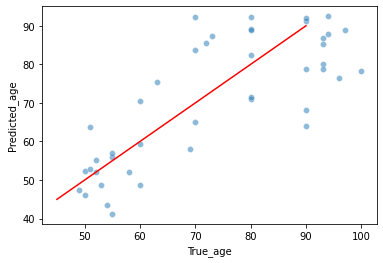

In [31]:
sns.scatterplot(data = val_set, x = 'True_age', y = 'Predicted_age', alpha = 0.5)
plt.plot( [45, 90], [45, 90], c = 'red')

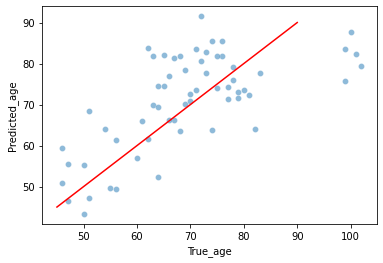

In [32]:
sns.scatterplot(data = test_set, x = 'True_age', y = 'Predicted_age', alpha = 0.5)
plt.plot( [45, 90], [45, 90], c = 'red')

In [33]:
plt.rcParams.update({'font.size' : 11})

Text(0.5, 1.0, 'GAM Age Predictions')

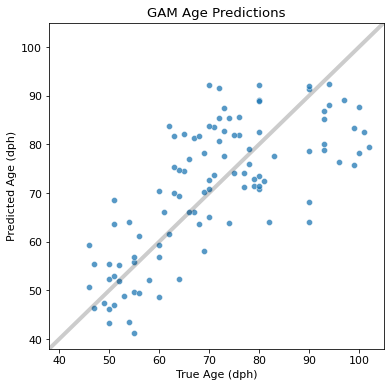

In [34]:
plt.figure(figsize = (6, 6))
plt.plot( [38, 105], [38, 105], c = 'black', linewidth = 4, alpha = 0.2)
sns.scatterplot(data = predictions_df, x = 'True_age', y = 'Predicted_age', alpha = 0.75)
plt.xlim(38, 105)
plt.ylim(38, 105)
plt.xlabel('True Age (dph)')
plt.ylabel('Predicted Age (dph)')
plt.title('GAM Age Predictions')

In [35]:
predictions_df.shape

(103, 4)

In [37]:
predictions_df.groupby('Bird_ID').count()

,True_age,Predicted_age,colony
Bird_ID,,,
G266,23,23,23
O434,1,1,1
O440,1,1,1
O472,4,4,4
O883,6,6,6
R262,20,20,20
R425,1,1,1
R469,1,1,1
R883,4,4,4


In [56]:
predictions_df['error'] = predictions_df.Predicted_age - predictions_df.True_age

Text(0, 0.5, 'Prediction Error (dph)')

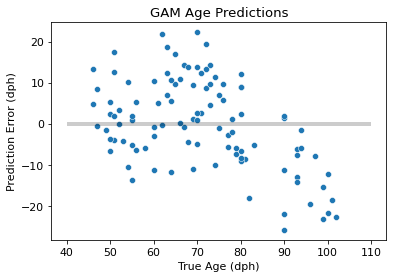

In [65]:
plt.figure(figsize = (6, 4))

plt.title('GAM Age Predictions')
sns.scatterplot(data = predictions_df, x = 'True_age', y = 'error')
plt.hlines(y = 0, xmin = 40, xmax = 110, linewidth = 4, alpha = 0.2, color = 'black')
plt.xlabel('True Age (dph)')
plt.ylabel('Prediction Error (dph)')

In [68]:
predictions_df['abs_error'] = np.abs(predictions_df.error)

In [69]:
predictions_df.describe()

,True_age,Predicted_age,error,abs_error
count,103.000000,103.000000,103.000000,103.000000
mean,70.815534,70.813252,-0.002282,8.772599
std,15.128047,13.759416,10.832876,6.295888
min,46.000000,41.191691,-25.902666,0.006364
25%,60.000000,60.340956,-6.637775,3.874441
50%,70.000000,72.976926,0.164976,7.977544
75%,80.000000,81.871434,9.028526,12.425699
max,102.000000,92.448306,22.284347,25.902666


In [70]:
predictions_df.groupby(['colony', 'Bird_ID']).count()

True_age  Predicted_age  error  abs_error
colony Bird_ID                                           
duke   grn394          5              5      5          5
       grn395          5              5      5          5
       grn397          4              4      4          4
       grn475          4              4      4          4
       sil469          4              4      4          4
fp1    O434            1              1      1          1
       O440            1              1      1          1
       R425            1              1      1          1
       R469            1              1      1          1
test   G266           23             23     23         23
       O472            4              4      4          4
       O883            6              6      6          6
       R262           20             20     20         20
       R883            4              4      4          4
       S264            1              1      1          1
       Y472            2              2      2          2
utsw   S855            5              5      5          5
       S856            6              6      6          6
       Y855            6              6      6          6

In [71]:
predictions_df.True_age.min()

46.0

In [72]:
predictions_df.True_age.max()

102.0

# Higher Regularization

In [99]:

#set terms of the model based on selected features
terms = s(selected_feature_indices[0], lam = 10) + s(selected_feature_indices[1], lam = 10) + \
        s(selected_feature_indices[2], lam = 10) + s(selected_feature_indices[3], lam = 10) + \
        s(selected_feature_indices[4], lam = 10) + s(selected_feature_indices[5], lam = 10) + \
        s(selected_feature_indices[6], lam = 10) 

#create bird-fold cross validation object
logo = LeaveOneGroupOut()
splits = logo.split(full_feats_only_norm, groups = all_feats.Bird_ID)

#initialize empty arrays to store predictions
y_preds = np.array([])
y_tests = np.array([])
Bird_IDs = np.array([])
#train and predict for each split in cross validation object
for train_index, test_index in splits:
    #print(groups.iloc[test_index].values[0])

    X_train, X_test = full_feats_only_norm[(train_index)], full_feats_only_norm[(test_index)]
    y_train, y_test = y[(train_index)], y[(test_index)]

    gam = LinearGAM(terms)

    gam.fit(X_train, y_train)
    y_pred = gam.predict(X_test)
    
    y_preds = np.concatenate([y_preds, y_pred])
    y_tests = np.concatenate([y_tests, y_test])
    Bird_IDs = np.concatenate([Bird_IDs, groups.iloc[test_index].values.flatten()])

In [100]:
predictions_df = pd.DataFrame({"True_age" : y_tests, 
                               "Predicted_age" : y_preds, 
                               "Bird_ID" : Bird_IDs})

In [101]:
all_bird_IDs = all_feats.Bird_ID.unique()
corresponding_colonies = [all_feats[all_feats.Bird_ID == Bird_ID].colony.iloc[0] for Bird_ID in all_bird_IDs]

colony_dict = dict(zip(all_bird_IDs, corresponding_colonies))

predictions_df['colony'] = [colony_dict[Bird_ID] for Bird_ID in predictions_df.Bird_ID]

## Plot Predictions

In [102]:
val_set = predictions_df[predictions_df.colony.isin(['duke', 'utsw', 'fp1'])]
test_set = predictions_df[predictions_df.colony.isin(['test'])]

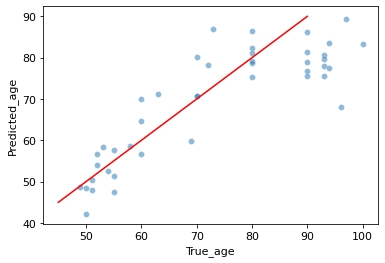

In [103]:
sns.scatterplot(data = val_set, x = 'True_age', y = 'Predicted_age', alpha = 0.5)
plt.plot( [45, 90], [45, 90], c = 'red')

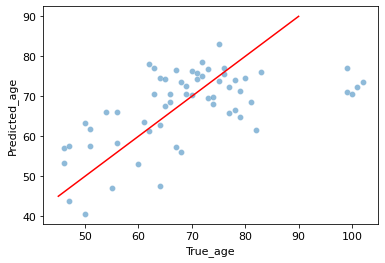

In [104]:
sns.scatterplot(data = test_set, x = 'True_age', y = 'Predicted_age', alpha = 0.5)
plt.plot( [45, 90], [45, 90], c = 'red')

In [105]:
plt.rcParams.update({'font.size' : 11})

Text(0.5, 1.0, 'GAM Age Predictions')

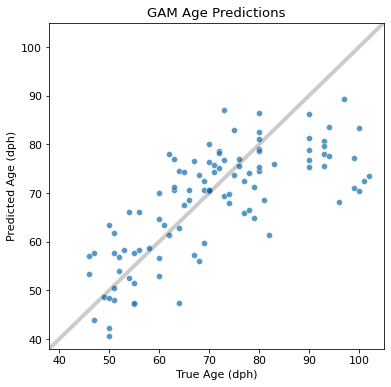

In [106]:
plt.figure(figsize = (6, 6))
plt.plot( [38, 105], [38, 105], c = 'black', linewidth = 4, alpha = 0.2)
sns.scatterplot(data = predictions_df, x = 'True_age', y = 'Predicted_age', alpha = 0.75)
plt.xlim(38, 105)
plt.ylim(38, 105)
plt.xlabel('True Age (dph)')
plt.ylabel('Predicted Age (dph)')
plt.title('GAM Age Predictions')

In [107]:
predictions_df['error'] = predictions_df.Predicted_age - predictions_df.True_age

Text(0, 0.5, 'Prediction Error (dph)')

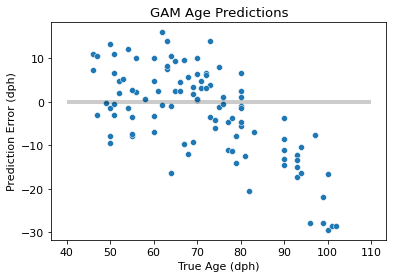

In [108]:
plt.figure(figsize = (6, 4))

plt.title('GAM Age Predictions')
sns.scatterplot(data = predictions_df, x = 'True_age', y = 'error')
plt.hlines(y = 0, xmin = 40, xmax = 110, linewidth = 4, alpha = 0.2, color = 'black')
plt.xlabel('True Age (dph)')
plt.ylabel('Prediction Error (dph)')

In [127]:
np.mean(predictions_df.error **2)

112.59592007312152

In [109]:
predictions_df['abs_error'] = np.abs(predictions_df.error)

In [110]:
predictions_df.describe()

,True_age,Predicted_age,error,abs_error
count,103.000000,103.000000,103.000000,103.000000
mean,70.815534,68.293371,-2.522163,8.189214
std,15.128047,11.223149,10.357419,6.780789
min,46.000000,40.557077,-29.488165,0.361477
25%,60.000000,59.206261,-8.978796,3.122110
50%,70.000000,70.620244,-0.876081,7.041406
75%,80.000000,76.667681,4.803806,11.119181
max,102.000000,89.251111,15.975453,29.488165


In [111]:
predictions_df.groupby(['colony', 'Bird_ID']).count()

True_age  Predicted_age  error  abs_error
colony Bird_ID                                           
duke   grn394          5              5      5          5
       grn395          5              5      5          5
       grn397          4              4      4          4
       grn475          4              4      4          4
       sil469          4              4      4          4
fp1    O434            1              1      1          1
       O440            1              1      1          1
       R425            1              1      1          1
       R469            1              1      1          1
test   G266           23             23     23         23
       O472            4              4      4          4
       O883            6              6      6          6
       R262           20             20     20         20
       R883            4              4      4          4
       S264            1              1      1          1
       Y472            2              2      2          2
utsw   S855            5              5      5          5
       S856            6              6      6          6
       Y855            6              6      6          6

In [112]:
predictions_df.True_age.min()

46.0

In [113]:
predictions_df.True_age.max()

102.0

Text(0, 0.5, 'Absolute Prediction Error (dph)')

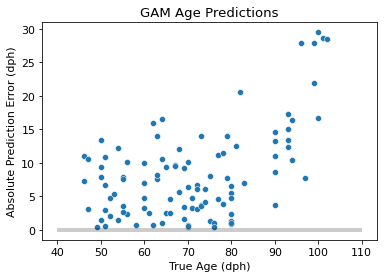

In [114]:
plt.figure(figsize = (6, 4))

plt.title('GAM Age Predictions')
sns.scatterplot(data = predictions_df, x = 'True_age', y = 'abs_error')
plt.hlines(y = 0, xmin = 40, xmax = 110, linewidth = 4, alpha = 0.2, color = 'black')
plt.xlabel('True Age (dph)')
plt.ylabel('Absolute Prediction Error (dph)')

## Comparison to Shuffle

As a null model, I'm going to randomly shuffle the predicted ages with respect to the true ages and calculate the error scores. 

In [117]:
predictions_shuffle_df = predictions_df[['Bird_ID', 'Predicted_age', 'True_age']]
predictions_shuffle_df['Predicted_age'] = np.random.permutation(predictions_shuffle_df.Predicted_age.values)

c:\Users\tkoch\anaconda3\envs\pyGAM_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'GAM Age Predictions')

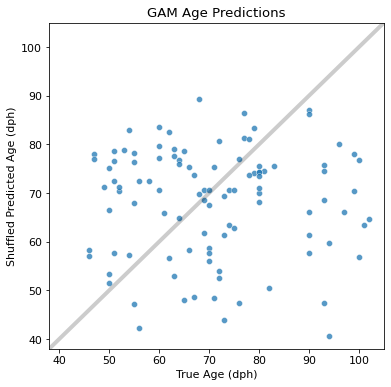

In [119]:
plt.figure(figsize = (6, 6))
plt.plot( [38, 105], [38, 105], c = 'black', linewidth = 4, alpha = 0.2)
sns.scatterplot(data = predictions_shuffle_df, x = 'True_age', y = 'Predicted_age', alpha = 0.75)
plt.xlim(38, 105)
plt.ylim(38, 105)
plt.xlabel('True Age (dph)')
plt.ylabel('Shuffled Predicted Age (dph)')
plt.title('GAM Age Predictions')

In [120]:
predictions_shuffle_df['error'] = predictions_shuffle_df.Predicted_age - predictions_shuffle_df.True_age

c:\Users\tkoch\anaconda3\envs\pyGAM_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
predictions_shuffle_df['abs_error'] = np.abs(predictions_shuffle_df.error)

c:\Users\tkoch\anaconda3\envs\pyGAM_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
predictions_shuffle_df.describe()

,Predicted_age,True_age,error,abs_error
count,103.000000,103.000000,103.000000,103.000000
mean,68.293371,70.815534,-2.522163,15.366487
std,11.223149,15.128047,18.844734,11.095212
min,40.557077,46.000000,-53.442923,0.431610
25%,59.206261,60.000000,-13.935483,6.136611
50%,70.620244,70.000000,-3.313657,12.968738
75%,76.667681,80.000000,12.524931,22.351000
max,89.251111,102.000000,30.999148,53.442923


In [124]:
from sklearn.metrics import mean_squared_error

In [128]:
MSEs = []
for i in range(10000):
    y_shuffle = np.random.permutation(y_preds)
    MSE = mean_squared_error(y_tests, y_shuffle)
    MSEs.append(MSE)

(array([3.000e+00, 2.700e+01, 2.670e+02, 1.137e+03, 2.551e+03, 3.119e+03,
        2.015e+03, 7.250e+02, 1.420e+02, 1.400e+01]),
 array([215.26631182, 242.0753214 , 268.88433099, 295.69334058,
        322.50235016, 349.31135975, 376.12036934, 402.92937892,
        429.73838851, 456.5473981 , 483.35640768]),
 <BarContainer object of 10 artists>)

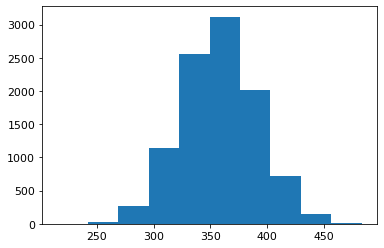

In [129]:
plt.hist(MSEs)

In [133]:
np.sum([x <= 112 for x in MSEs])

0